<a href="https://colab.research.google.com/github/visiont3lab/covid-mask-classifier/blob/master/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
%cd /content/drive/My Drive/Classification-Project

/content/drive/My Drive/Classification-Project


In [2]:
!git clone https://github.com/visiont3lab/covid-mask-classifier.git

Cloning into 'covid-mask-classifier'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1019 (delta 1), reused 0 (delta 0), pack-reused 1013
Receiving objects: 100% (1019/1019), 66.93 MiB | 16.65 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (1004/1004), done.


In [28]:
%cd covid-mask-classifier/

/content/drive/My Drive/Classification-Project/covid-mask-classifier


In [55]:
import os
import cv2 #opencv-python
from google.colab.patches import cv2_imshow
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, auc,precision_score,recall_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import joblib
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [42]:
def load_data():
    folder_path = "dataset"
    channel = 3
    size = 32

    ## -----------  Read Data
    class_name =  ["mask", "no-mask"]

    num_classes = len(class_name)
    X = []
    Y = []
    for i in range(0,num_classes):
        fpath = os.path.join(folder_path, class_name[i])
        for name in os.listdir(fpath):
            path_read_im = os.path.join(fpath, name)
            #print(path_read_im)
            im = None
            if channel==3: 
                im = cv2.imread(path_read_im,1) # COLOR
            else:
                im = cv2.imread(path_read_im,0) # GRAY

            im = cv2.resize(im, (size,size), interpolation = cv2.INTER_AREA)
            im = im.reshape(size*size*channel)

            X.append(im)
            Y.append(i)

    X = np.array(X, dtype="float32")
    Y = np.array(Y, dtype="float32")

    print(X.shape)
    print(Y.shape)
    return X,Y

X,Y = load_data()

(999, 1024)
(999,)


In [ ]:
def compare_models(X,Y):
    # user variables to tune
    seed    = 5
    folds   = 5 # 10 = 10%, 5 = 20% for testing
    #5-fold cross validation. This means that 20% of the data is used for testing, this is usually pretty accurate.
    metric  ="roc_auc"

    sc = MinMaxScaler() # 0-1
    X = sc.fit_transform(X)

    # hold different regression models in a single dictionary
    models = {}
    models["GradientBoost"]        = GradientBoostingClassifier() #n_estimators=50)
    models["RandomForest"]         = RandomForestClassifier() #n_estimators=100)
    #models["NaiveBayes"]           = GaussianNB()
    models["Logistic"]             = LogisticRegression()
    models["SVC"]                  = SVC(probability=True)

    # 10-fold cross validation for each model
    model_results = []
    model_names   = []
    for model_name in models:
        model   = models[model_name]
        k_fold  = KFold(n_splits=folds, random_state=seed,shuffle=True)
        results = cross_val_score(model, X, Y, cv=k_fold, scoring=metric)

        model_results.append(results)
        model_names.append(model_name)
        print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

compare_models(X,Y)

In [57]:
def save_model_joblib(inp_name,inp_clf):
    joblib.dump(inp_clf, inp_name) 
    
def train(X,Y):
    X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ("sc", MinMaxScaler()), # 0-1 features
        #('polinomial', PolynomialFeatures(degree=3)),
        #("pca", PCA(n_components=0.98)),
        ("model", SVC(probability=True) )
    ])

    tuned_parameters = [
                {'model__kernel': ['rbf'],  'model__C': [1, 10, 100, 1000]},
                {'model__kernel': ['linear'], 'model__C': [1, 10, 100, 1000]},
                {'model__kernel' : ['poly'], 'model__degree' : [2,3,4] ,'model__C': [1, 10, 100, 1000]}
            ]
    
    grid_search = RandomizedSearchCV(
        pipeline, tuned_parameters, scoring='f1_macro'
    )

    # Train
    grid_search.fit(X_train,Y_train)

    # Score
    score = grid_search.best_estimator_.score(X,Y)
    print("f1_weighted score : ", score)



    save_model_joblib("model.pkl", grid_search.best_estimator_)
    return grid_search.best_estimator_

train(X,Y)

f1_weighted score :  0.991991991991992


Pipeline(memory=None,
         steps=[('sc', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('model',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

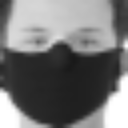

Mask: 1.0


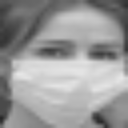

Mask: 1.0


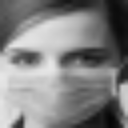

Mask: 1.0


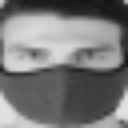

Mask: 1.0


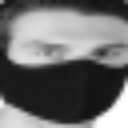

Mask: 1.0


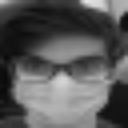

Mask: 1.0


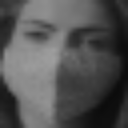

Mask: 1.0


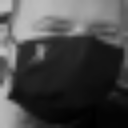

Mask: 1.0


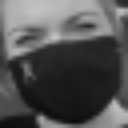

Mask: 1.0


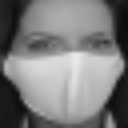

Mask: 1.0


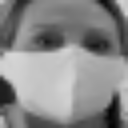

Mask: 1.0


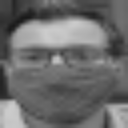

Mask: 1.0


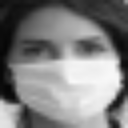

Mask: 1.0


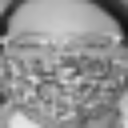

Mask: 1.0


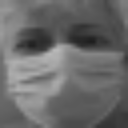

Mask: 1.0


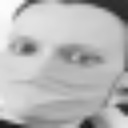

Mask: 1.0


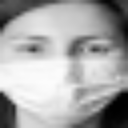

Mask: 1.0


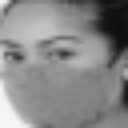

Mask: 1.0


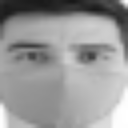

Mask: 1.0


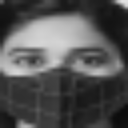

Mask: 1.0


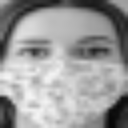

Mask: 1.0


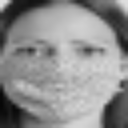

Mask: 1.0


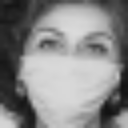

Mask: 1.0


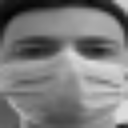

Mask: 1.0


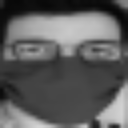

Mask: 1.0


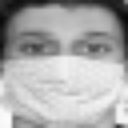

Mask: 1.0


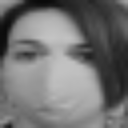

Mask: 1.0


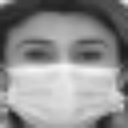

Mask: 1.0


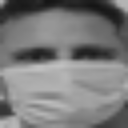

Mask: 1.0


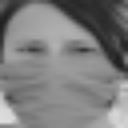

Mask: 0.1


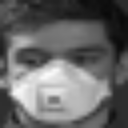

Mask: 1.0


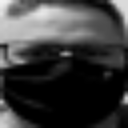

Mask: 1.0


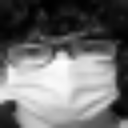

Mask: 1.0


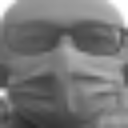

Mask: 1.0


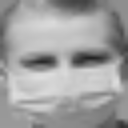

Mask: 1.0


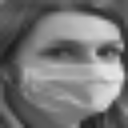

Mask: 1.0


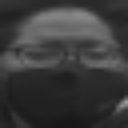

Mask: 1.0


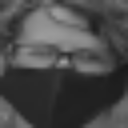

Mask: 1.0


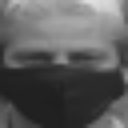

Mask: 1.0


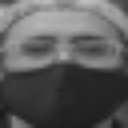

Mask: 1.0


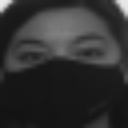

Mask: 1.0


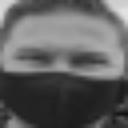

Mask: 1.0


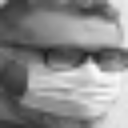

Mask: 1.0


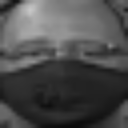

Mask: 1.0


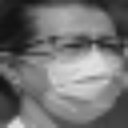

Mask: 0.8


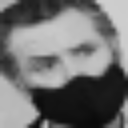

Mask: 1.0


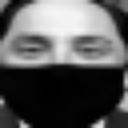

Mask: 1.0


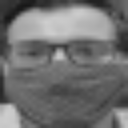

Mask: 1.0


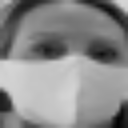

Mask: 1.0


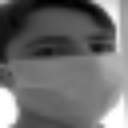

Mask: 1.0


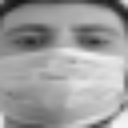

Mask: 1.0


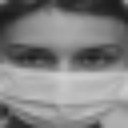

Mask: 1.0


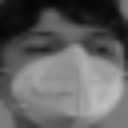

Mask: 1.0


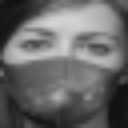

Mask: 1.0


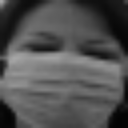

Mask: 1.0


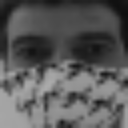

Mask: 1.0


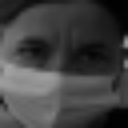

Mask: 1.0


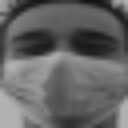

Mask: 1.0


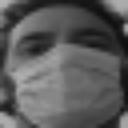

Mask: 1.0


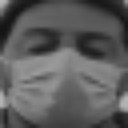

Mask: 1.0


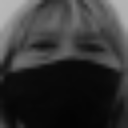

Mask: 1.0


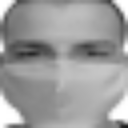

Mask: 1.0


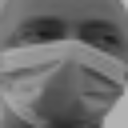

Mask: 1.0


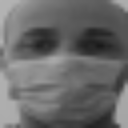

Mask: 1.0


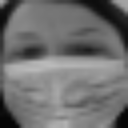

Mask: 1.0


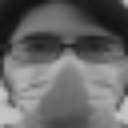

Mask: 1.0


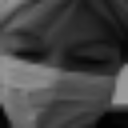

Mask: 1.0


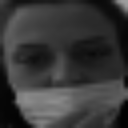

Mask: 1.0


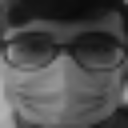

Mask: 1.0


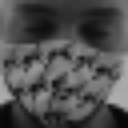

Mask: 1.0


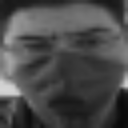

Mask: 0.9


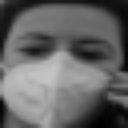

Mask: 1.0


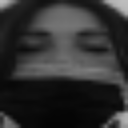

Mask: 0.9


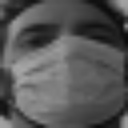

Mask: 1.0


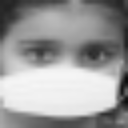

Mask: 1.0


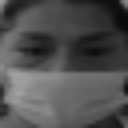

Mask: 1.0


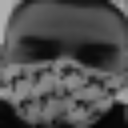

Mask: 1.0


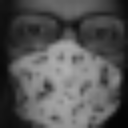

Mask: 1.0


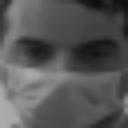

Mask: 1.0


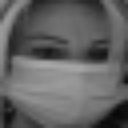

Mask: 1.0


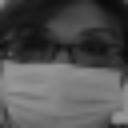

Mask: 1.0


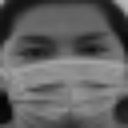

Mask: 1.0


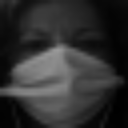

Mask: 1.0


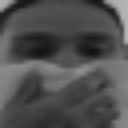

Mask: 1.0


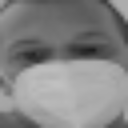

Mask: 1.0


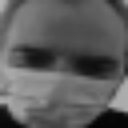

Mask: 1.0


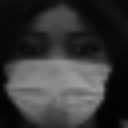

Mask: 1.0


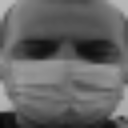

Mask: 1.0


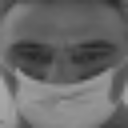

Mask: 1.0


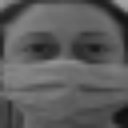

Mask: 1.0


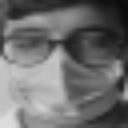

Mask: 1.0


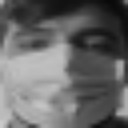

Mask: 1.0


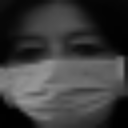

Mask: 1.0


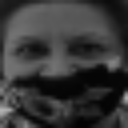

Mask: 1.0


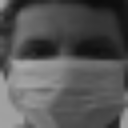

Mask: 1.0


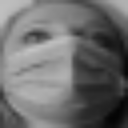

Mask: 1.0


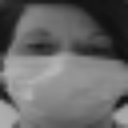

Mask: 1.0


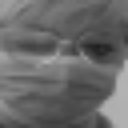

Mask: 1.0


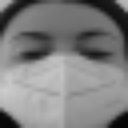

Mask: 1.0


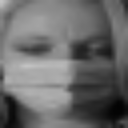

Mask: 1.0


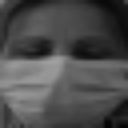

Mask: 1.0


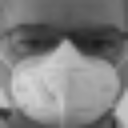

Mask: 1.0


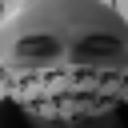

Mask: 1.0


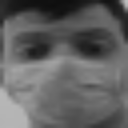

Mask: 1.0


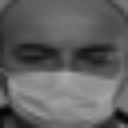

Mask: 1.0


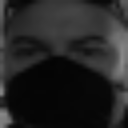

Mask: 1.0


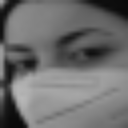

Mask: 1.0


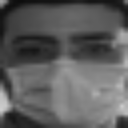

Mask: 1.0


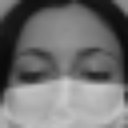

Mask: 1.0


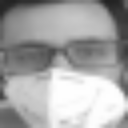

Mask: 1.0


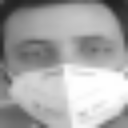

Mask: 1.0


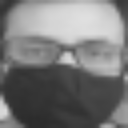

Mask: 1.0


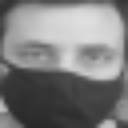

Mask: 1.0


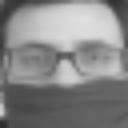

Mask: 1.0


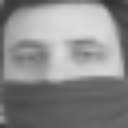

Mask: 1.0


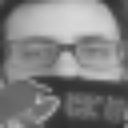

Mask: 1.0


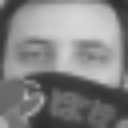

Mask: 1.0


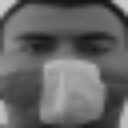

Mask: 1.0


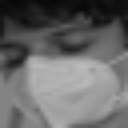

Mask: 1.0


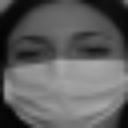

Mask: 1.0


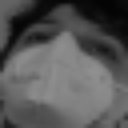

Mask: 1.0


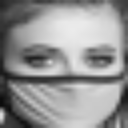

Mask: 1.0


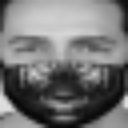

Mask: 1.0


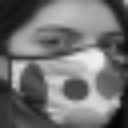

Mask: 1.0


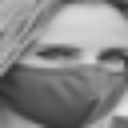

Mask: 1.0


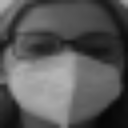

Mask: 1.0


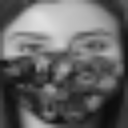

Mask: 1.0


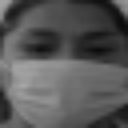

Mask: 1.0


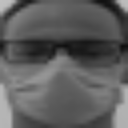

Mask: 1.0


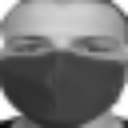

Mask: 1.0


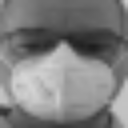

Mask: 1.0


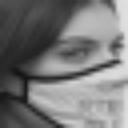

Mask: 1.0


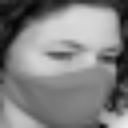

Mask: 1.0


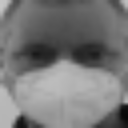

Mask: 1.0


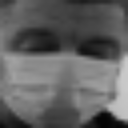

Mask: 1.0


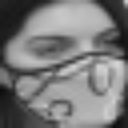

Mask: 1.0


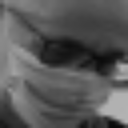

Mask: 1.0


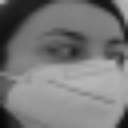

Mask: 1.0


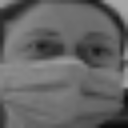

Mask: 1.0


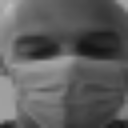

Mask: 1.0


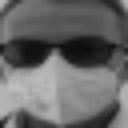

Mask: 1.0


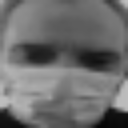

Mask: 1.0


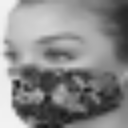

Mask: 1.0


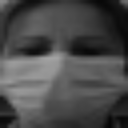

Mask: 1.0


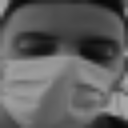

Mask: 1.0


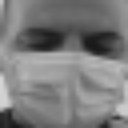

Mask: 1.0


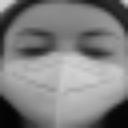

Mask: 1.0


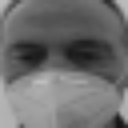

Mask: 1.0


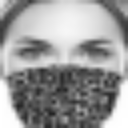

Mask: 1.0


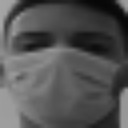

Mask: 1.0


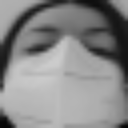

Mask: 1.0


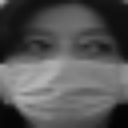

Mask: 1.0


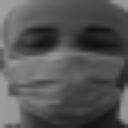

Mask: 1.0


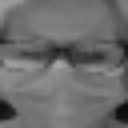

Mask: 1.0


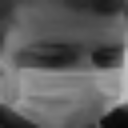

Mask: 1.0


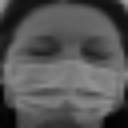

Mask: 1.0


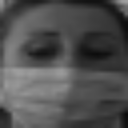

Mask: 1.0


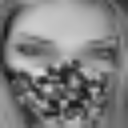

Mask: 1.0


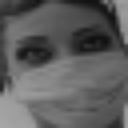

Mask: 1.0


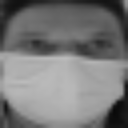

Mask: 1.0


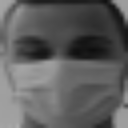

Mask: 1.0


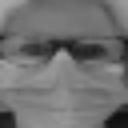

Mask: 1.0


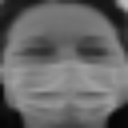

Mask: 1.0


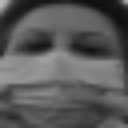

Mask: 1.0


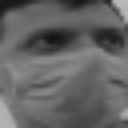

Mask: 1.0


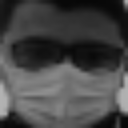

Mask: 1.0


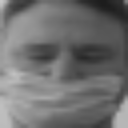

Mask: 1.0


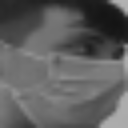

Mask: 1.0


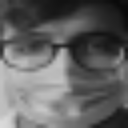

Mask: 1.0


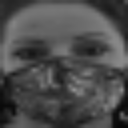

Mask: 1.0


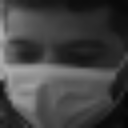

Mask: 1.0


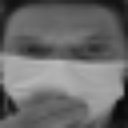

Mask: 1.0


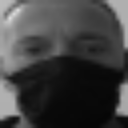

Mask: 1.0


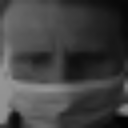

Mask: 1.0


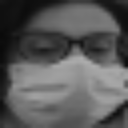

Mask: 1.0


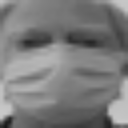

Mask: 1.0


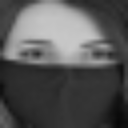

Mask: 1.0


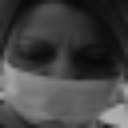

Mask: 1.0


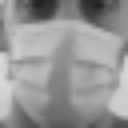

Mask: 1.0


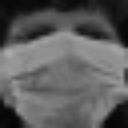

Mask: 1.0


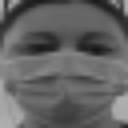

Mask: 1.0


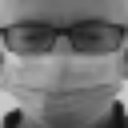

Mask: 1.0


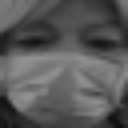

Mask: 1.0


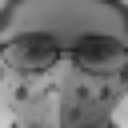

Mask: 1.0


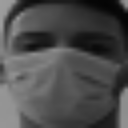

Mask: 1.0


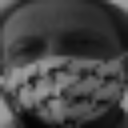

Mask: 1.0


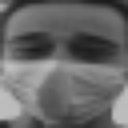

Mask: 1.0


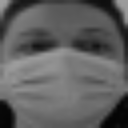

Mask: 1.0


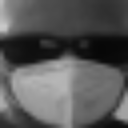

Mask: 1.0


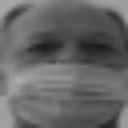

Mask: 1.0


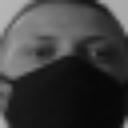

Mask: 1.0


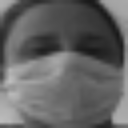

Mask: 1.0


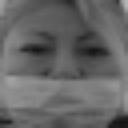

Mask: 1.0


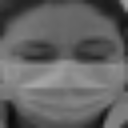

Mask: 1.0


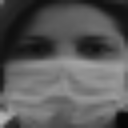

Mask: 1.0


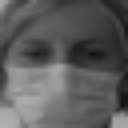

Mask: 1.0


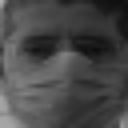

Mask: 1.0


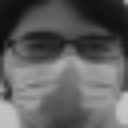

Mask: 1.0


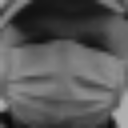

Mask: 1.0


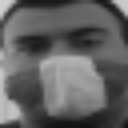

Mask: 1.0


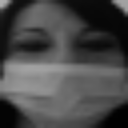

Mask: 1.0


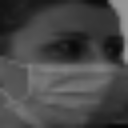

Mask: 1.0


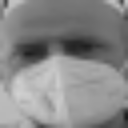

Mask: 1.0


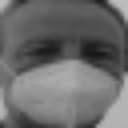

Mask: 1.0


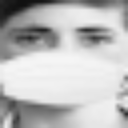

Mask: 1.0


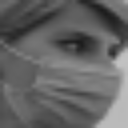

Mask: 1.0


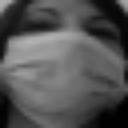

Mask: 1.0


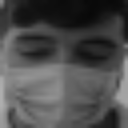

Mask: 1.0


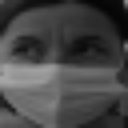

Mask: 1.0


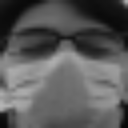

Mask: 1.0


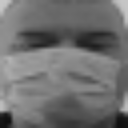

Mask: 1.0


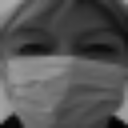

Mask: 1.0


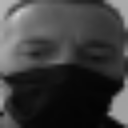

Mask: 1.0


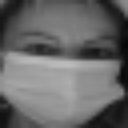

Mask: 1.0


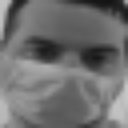

Mask: 1.0


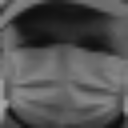

Mask: 1.0


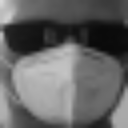

Mask: 1.0


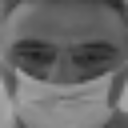

Mask: 1.0


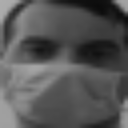

Mask: 1.0


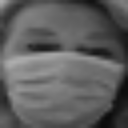

Mask: 1.0


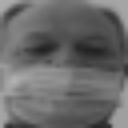

Mask: 1.0


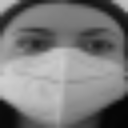

Mask: 1.0


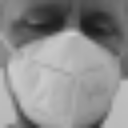

Mask: 1.0


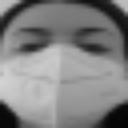

Mask: 1.0


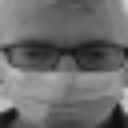

Mask: 1.0


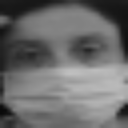

Mask: 1.0


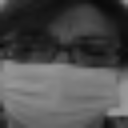

Mask: 1.0


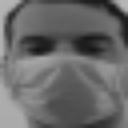

Mask: 1.0


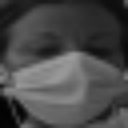

Mask: 1.0


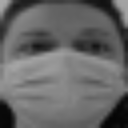

Mask: 1.0


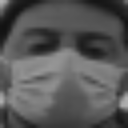

Mask: 1.0


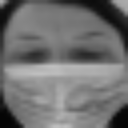

Mask: 1.0


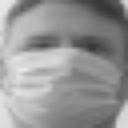

Mask: 1.0


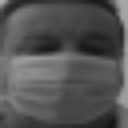

Mask: 1.0


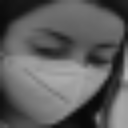

Mask: 1.0


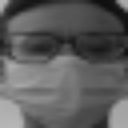

Mask: 1.0


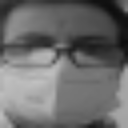

Mask: 1.0


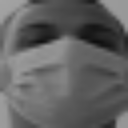

Mask: 1.0


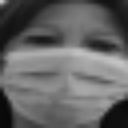

Mask: 1.0


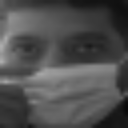

Mask: 1.0


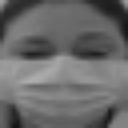

Mask: 1.0


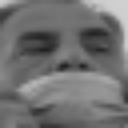

Mask: 1.0


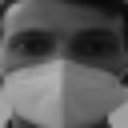

Mask: 1.0


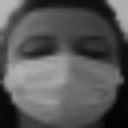

Mask: 1.0


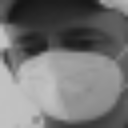

Mask: 1.0


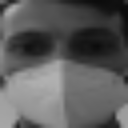

Mask: 1.0


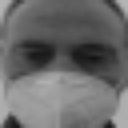

Mask: 1.0


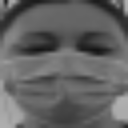

Mask: 1.0


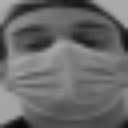

Mask: 1.0


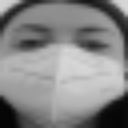

Mask: 1.0


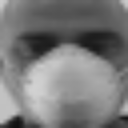

Mask: 1.0


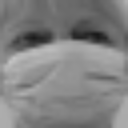

Mask: 1.0


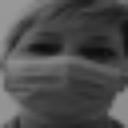

Mask: 1.0


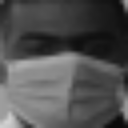

Mask: 1.0


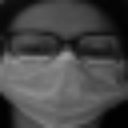

Mask: 1.0


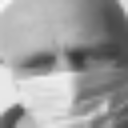

Mask: 1.0


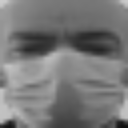

Mask: 1.0


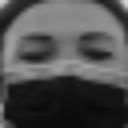

Mask: 1.0


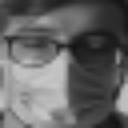

Mask: 1.0


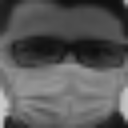

Mask: 1.0


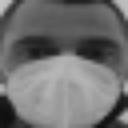

Mask: 1.0


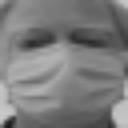

Mask: 1.0


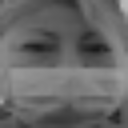

Mask: 1.0


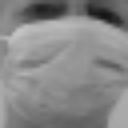

Mask: 1.0


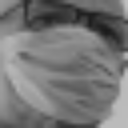

Mask: 1.0


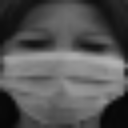

Mask: 1.0


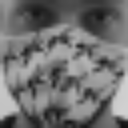

Mask: 0.9


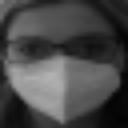

Mask: 1.0


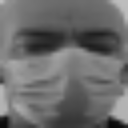

Mask: 1.0


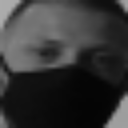

Mask: 1.0


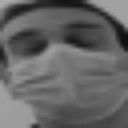

Mask: 1.0


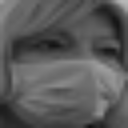

Mask: 1.0


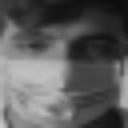

Mask: 1.0


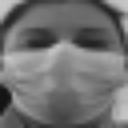

Mask: 1.0


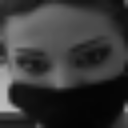

Mask: 1.0


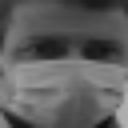

Mask: 1.0


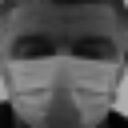

Mask: 1.0


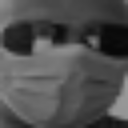

Mask: 1.0


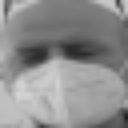

Mask: 1.0


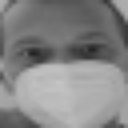

Mask: 1.0


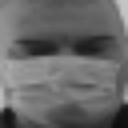

Mask: 1.0


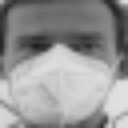

Mask: 1.0


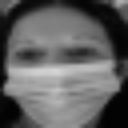

Mask: 1.0


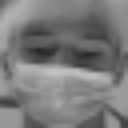

Mask: 1.0


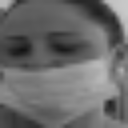

Mask: 1.0


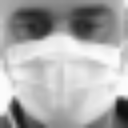

Mask: 1.0


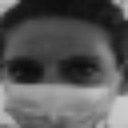

Mask: 1.0


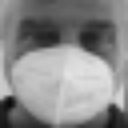

Mask: 1.0


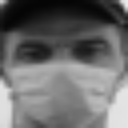

Mask: 1.0


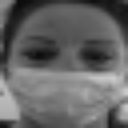

Mask: 1.0


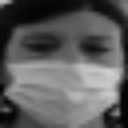

Mask: 1.0


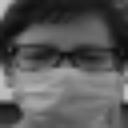

Mask: 1.0


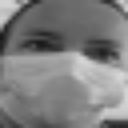

Mask: 1.0


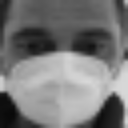

Mask: 1.0


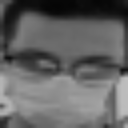

Mask: 1.0


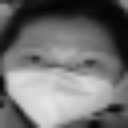

Mask: 1.0


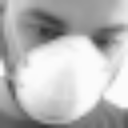

Mask: 1.0


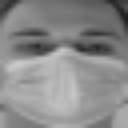

Mask: 1.0


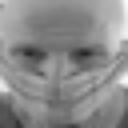

Mask: 0.6


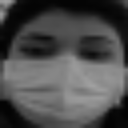

Mask: 1.0


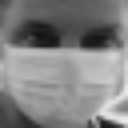

Mask: 1.0


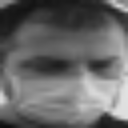

Mask: 1.0


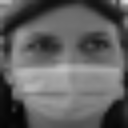

Mask: 1.0


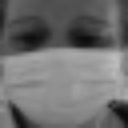

Mask: 1.0


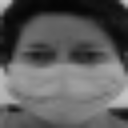

Mask: 1.0


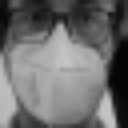

Mask: 1.0


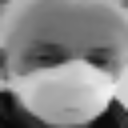

Mask: 1.0


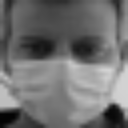

Mask: 1.0


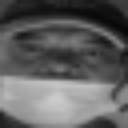

Mask: 1.0


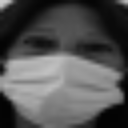

Mask: 1.0


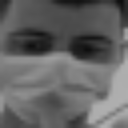

Mask: 1.0


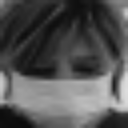

Mask: 1.0


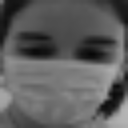

Mask: 1.0


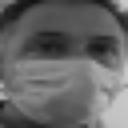

Mask: 1.0


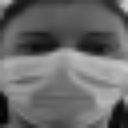

Mask: 1.0


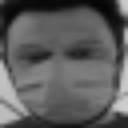

Mask: 1.0


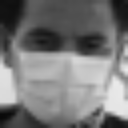

Mask: 1.0


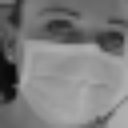

Mask: 1.0


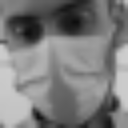

Mask: 0.9


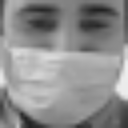

Mask: 1.0


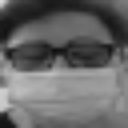

Mask: 1.0


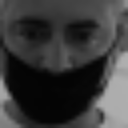

Mask: 1.0


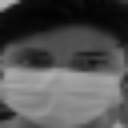

Mask: 1.0


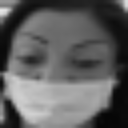

Mask: 1.0


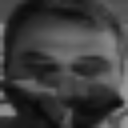

Mask: 1.0


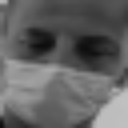

Mask: 1.0


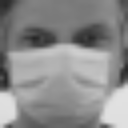

Mask: 1.0


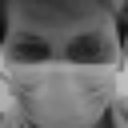

Mask: 1.0


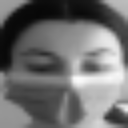

Mask: 0.9


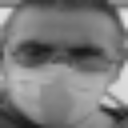

Mask: 1.0


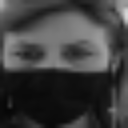

Mask: 1.0


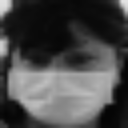

Mask: 1.0


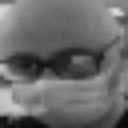

Mask: 1.0


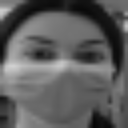

Mask: 1.0


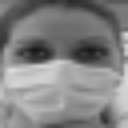

Mask: 1.0


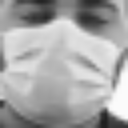

Mask: 1.0


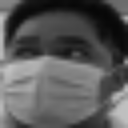

Mask: 1.0


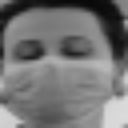

Mask: 1.0


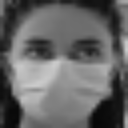

Mask: 1.0


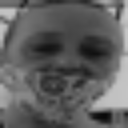

Mask: 1.0


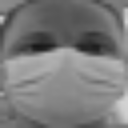

Mask: 1.0


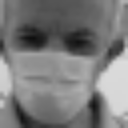

Mask: 1.0


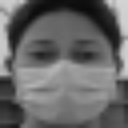

Mask: 1.0


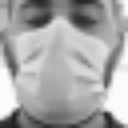

Mask: 1.0


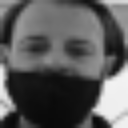

Mask: 0.3


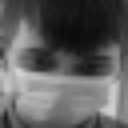

Mask: 1.0


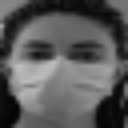

Mask: 1.0


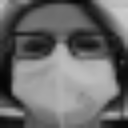

Mask: 1.0


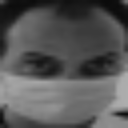

Mask: 1.0


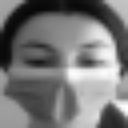

Mask: 1.0


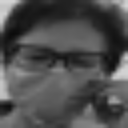

Mask: 1.0


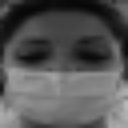

Mask: 1.0


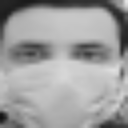

Mask: 1.0


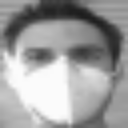

Mask: 1.0


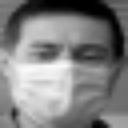

Mask: 1.0


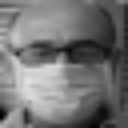

Mask: 1.0


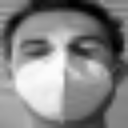

Mask: 1.0


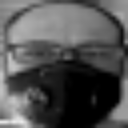

Mask: 1.0


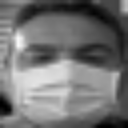

Mask: 1.0


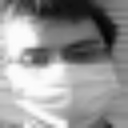

Mask: 1.0


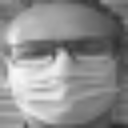

Mask: 1.0


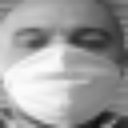

Mask: 1.0


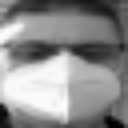

Mask: 1.0


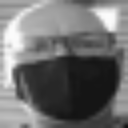

Mask: 0.9


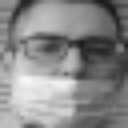

Mask: 1.0


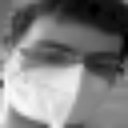

Mask: 1.0


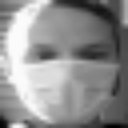

Mask: 1.0


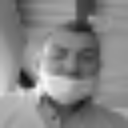

Mask: 1.0


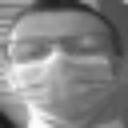

Mask: 1.0


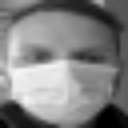

Mask: 1.0


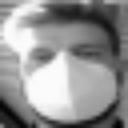

Mask: 1.0


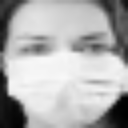

Mask: 0.8


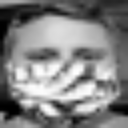

Mask: 1.0


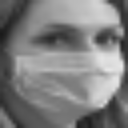

Mask: 1.0


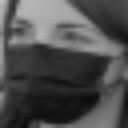

Mask: 1.0


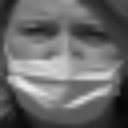

Mask: 1.0


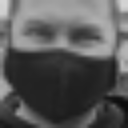

Mask: 1.0


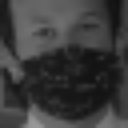

Mask: 1.0


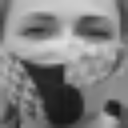

Mask: 1.0


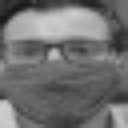

Mask: 1.0


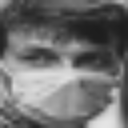

Mask: 1.0


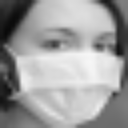

Mask: 1.0


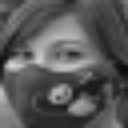

Mask: 1.0


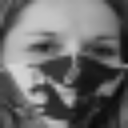

Mask: 1.0


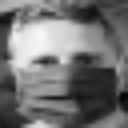

Mask: 1.0


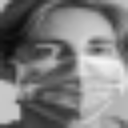

Mask: 1.0


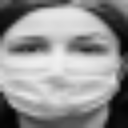

Mask: 1.0


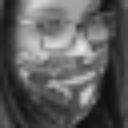

Mask: 1.0


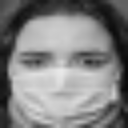

Mask: 1.0


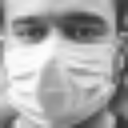

Mask: 1.0


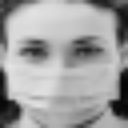

Mask: 1.0


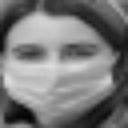

Mask: 1.0


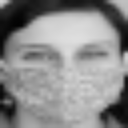

Mask: 1.0


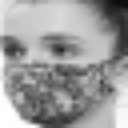

Mask: 1.0


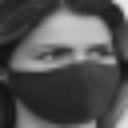

Mask: 1.0


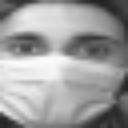

Mask: 1.0


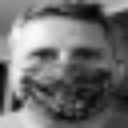

Mask: 1.0


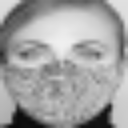

Mask: 1.0


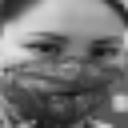

Mask: 0.9


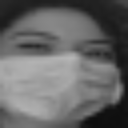

Mask: 1.0


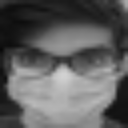

Mask: 1.0


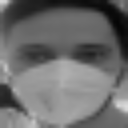

Mask: 1.0


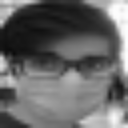

Mask: 1.0


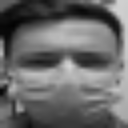

Mask: 1.0


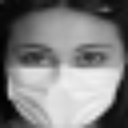

Mask: 1.0


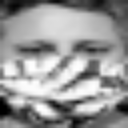

Mask: 1.0


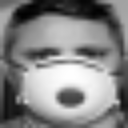

Mask: 1.0


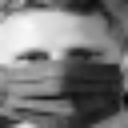

Mask: 1.0


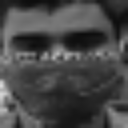

Mask: 1.0


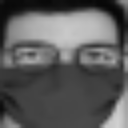

Mask: 1.0


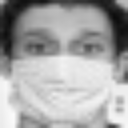

Mask: 1.0


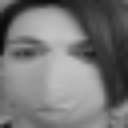

Mask: 0.9


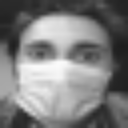

Mask: 1.0


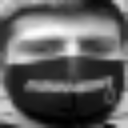

Mask: 1.0


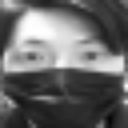

Mask: 1.0


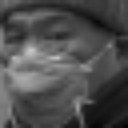

Mask: 1.0


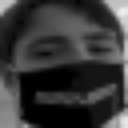

Mask: 1.0


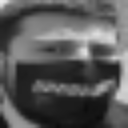

Mask: 1.0


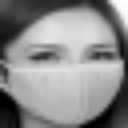

Mask: 1.0


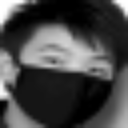

Mask: 1.0


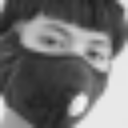

Mask: 1.0


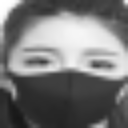

Mask: 1.0


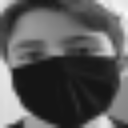

Mask: 1.0


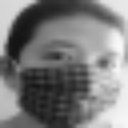

Mask: 0.2


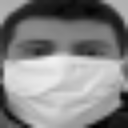

Mask: 1.0


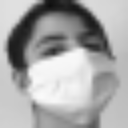

Mask: 0.9


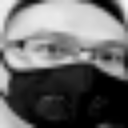

Mask: 1.0


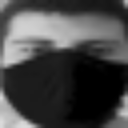

Mask: 1.0


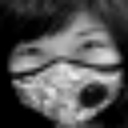

Mask: 1.0


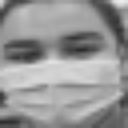

Mask: 1.0


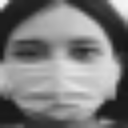

Mask: 1.0


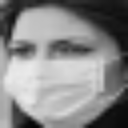

Mask: 1.0


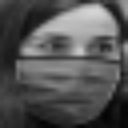

Mask: 0.6


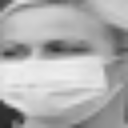

Mask: 1.0


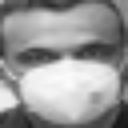

Mask: 1.0


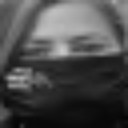

Mask: 1.0


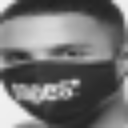

Mask: 1.0


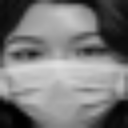

Mask: 1.0


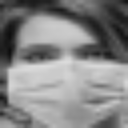

Mask: 1.0


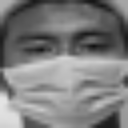

Mask: 1.0


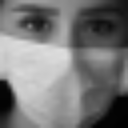

Mask: 1.0


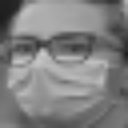

Mask: 1.0


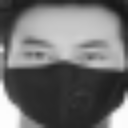

Mask: 1.0


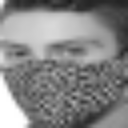

Mask: 1.0


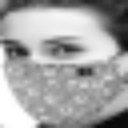

Mask: 1.0


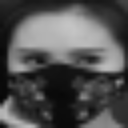

Mask: 1.0


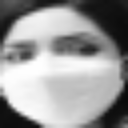

Mask: 1.0


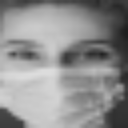

Mask: 1.0


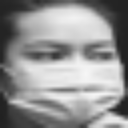

Mask: 1.0


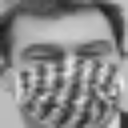

Mask: 0.5


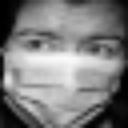

Mask: 1.0


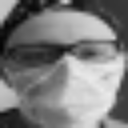

Mask: 1.0


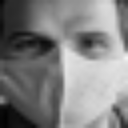

Mask: 1.0


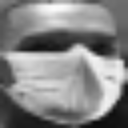

Mask: 1.0


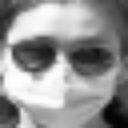

Mask: 1.0


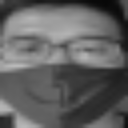

Mask: 1.0


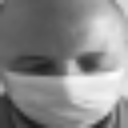

Mask: 1.0


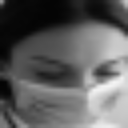

Mask: 1.0


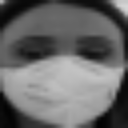

Mask: 1.0


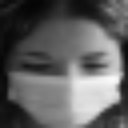

Mask: 1.0


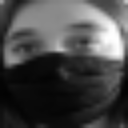

Mask: 1.0


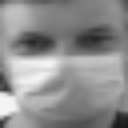

Mask: 1.0


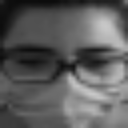

Mask: 1.0


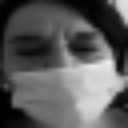

Mask: 1.0


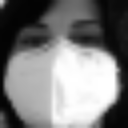

Mask: 0.8


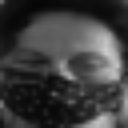

Mask: 1.0


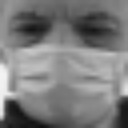

Mask: 1.0


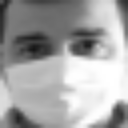

Mask: 1.0


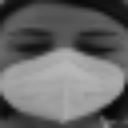

Mask: 1.0


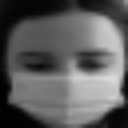

Mask: 1.0


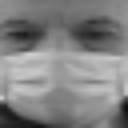

Mask: 1.0


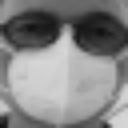

Mask: 1.0


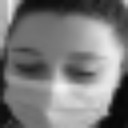

Mask: 1.0


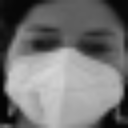

Mask: 1.0


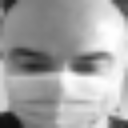

Mask: 1.0


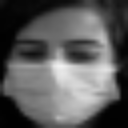

Mask: 1.0


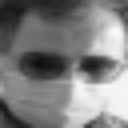

Mask: 1.0


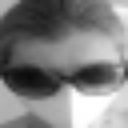

Mask: 1.0


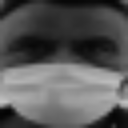

Mask: 1.0


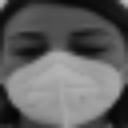

Mask: 1.0


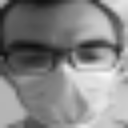

Mask: 1.0


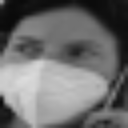

Mask: 1.0


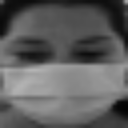

Mask: 1.0


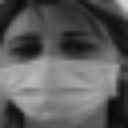

Mask: 1.0


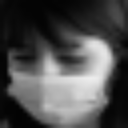

Mask: 1.0


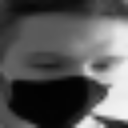

Mask: 0.6


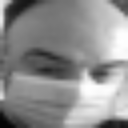

Mask: 1.0


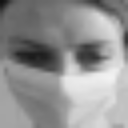

Mask: 1.0


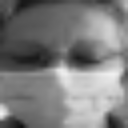

Mask: 1.0


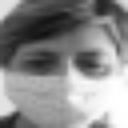

Mask: 1.0


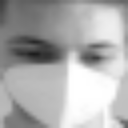

Mask: 1.0


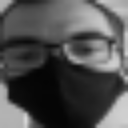

Mask: 1.0


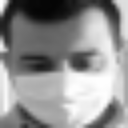

Mask: 1.0


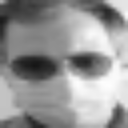

Mask: 1.0


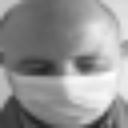

Mask: 1.0


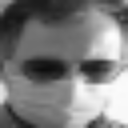

Mask: 1.0


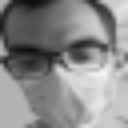

Mask: 1.0


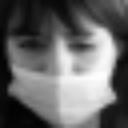

Mask: 1.0


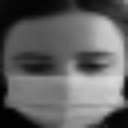

Mask: 1.0


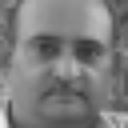

Mask: 0.0


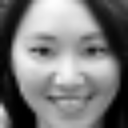

Mask: 0.0


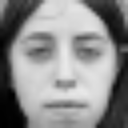

Mask: 0.0


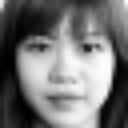

Mask: 0.0


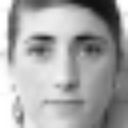

Mask: 0.0


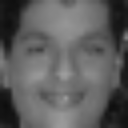

Mask: 0.0


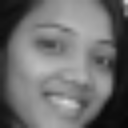

Mask: 0.0


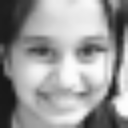

Mask: 0.0


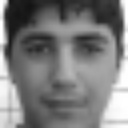

Mask: 0.0


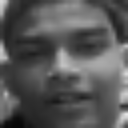

Mask: 0.0


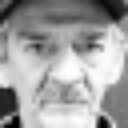

Mask: 0.0


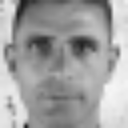

Mask: 0.0


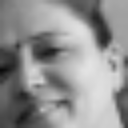

Mask: 0.0


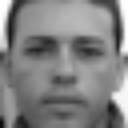

Mask: 0.0


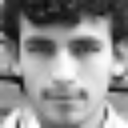

Mask: 0.2


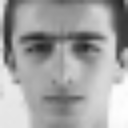

Mask: 0.0


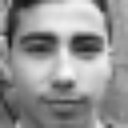

Mask: 0.0


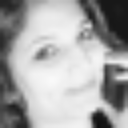

Mask: 0.0


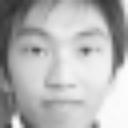

Mask: 0.0


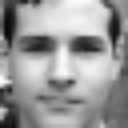

Mask: 0.0


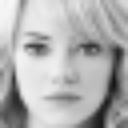

Mask: 0.0


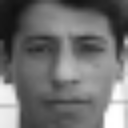

Mask: 0.0


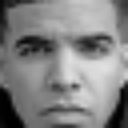

Mask: 0.1


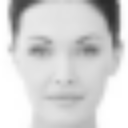

Mask: 0.0


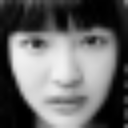

Mask: 0.0


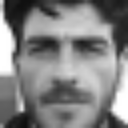

Mask: 0.0


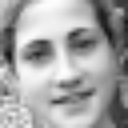

Mask: 0.0


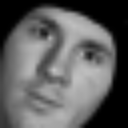

Mask: 0.0


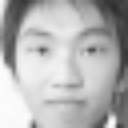

Mask: 0.0


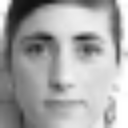

Mask: 0.0


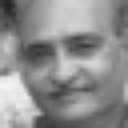

Mask: 0.0


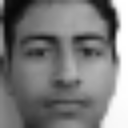

Mask: 0.0


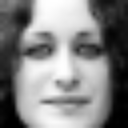

Mask: 0.0


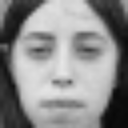

Mask: 0.0


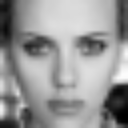

Mask: 0.0


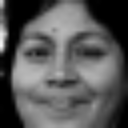

Mask: 0.0


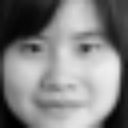

Mask: 0.0


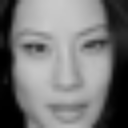

Mask: 0.0


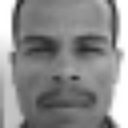

Mask: 0.0


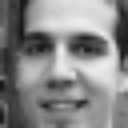

Mask: 0.0


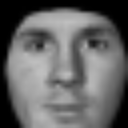

Mask: 0.0


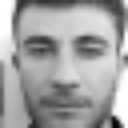

Mask: 0.0


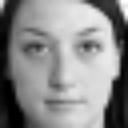

Mask: 0.0


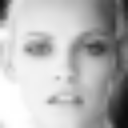

Mask: 0.0


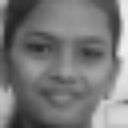

Mask: 0.0


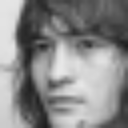

Mask: 0.0


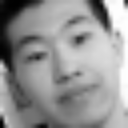

Mask: 0.0


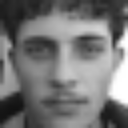

Mask: 0.0


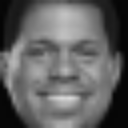

Mask: 0.0


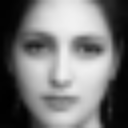

Mask: 0.0


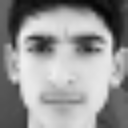

Mask: 0.0


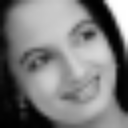

Mask: 0.0


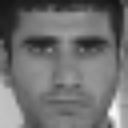

Mask: 0.0


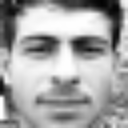

Mask: 0.0


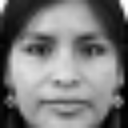

Mask: 0.0


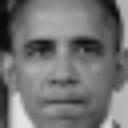

Mask: 0.0


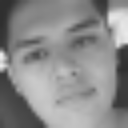

Mask: 0.0


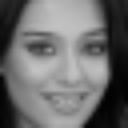

Mask: 0.0


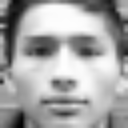

Mask: 0.0


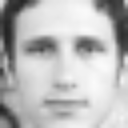

Mask: 0.0


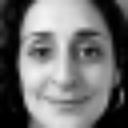

Mask: 0.0


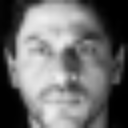

Mask: 0.0


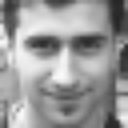

Mask: 0.0


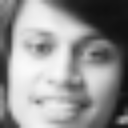

Mask: 0.0


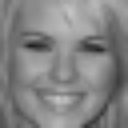

Mask: 0.0


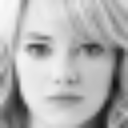

Mask: 0.0


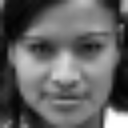

Mask: 0.0


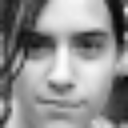

Mask: 0.0


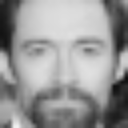

Mask: 0.0


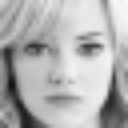

Mask: 0.0


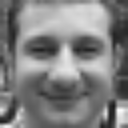

Mask: 0.0


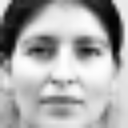

Mask: 0.0


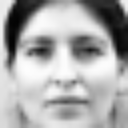

Mask: 0.0


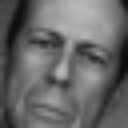

Mask: 0.0


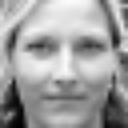

Mask: 0.0


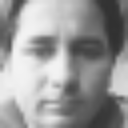

Mask: 0.0


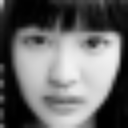

Mask: 0.0


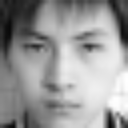

Mask: 0.5


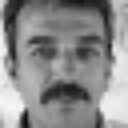

Mask: 0.0


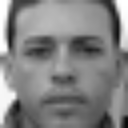

Mask: 0.0


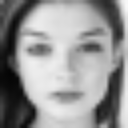

Mask: 0.0


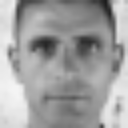

Mask: 0.0


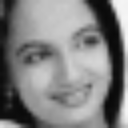

Mask: 0.0


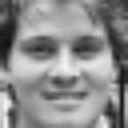

Mask: 0.0


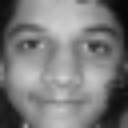

Mask: 0.0


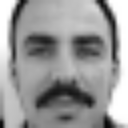

Mask: 0.0


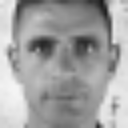

Mask: 0.0


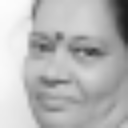

Mask: 0.0


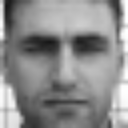

Mask: 0.0


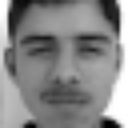

Mask: 0.0


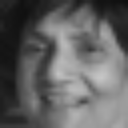

Mask: 0.0


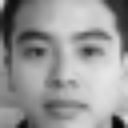

Mask: 0.0


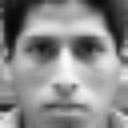

Mask: 0.0


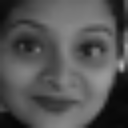

Mask: 0.0


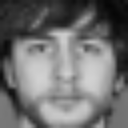

Mask: 0.0


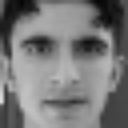

Mask: 0.0


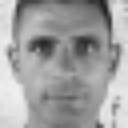

Mask: 0.0


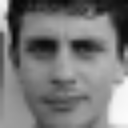

Mask: 0.0


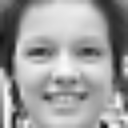

Mask: 0.0


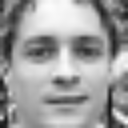

Mask: 0.0


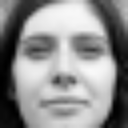

Mask: 0.0


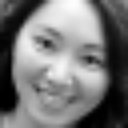

Mask: 0.0


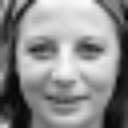

Mask: 0.0


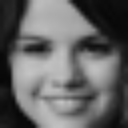

Mask: 0.0


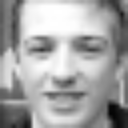

Mask: 0.0


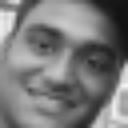

Mask: 0.0


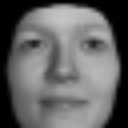

Mask: 0.0


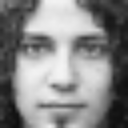

Mask: 0.0


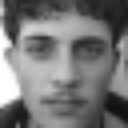

Mask: 0.0


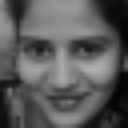

Mask: 0.0


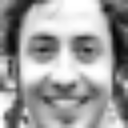

Mask: 0.0


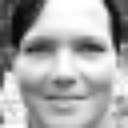

Mask: 0.0


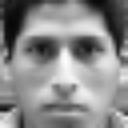

Mask: 0.0


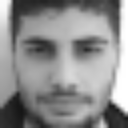

Mask: 0.0


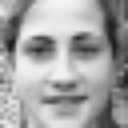

Mask: 0.0


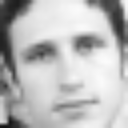

Mask: 0.0


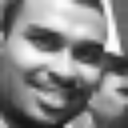

Mask: 0.0


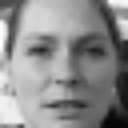

Mask: 0.0


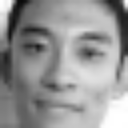

Mask: 0.0


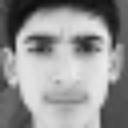

Mask: 0.0


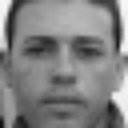

Mask: 0.0


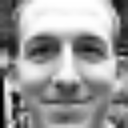

Mask: 0.0


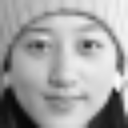

Mask: 0.0


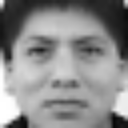

Mask: 0.0


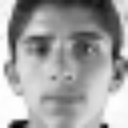

Mask: 0.0


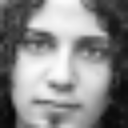

Mask: 0.0


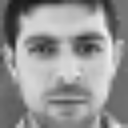

Mask: 0.0


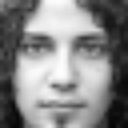

Mask: 0.0


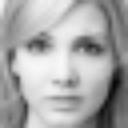

Mask: 0.0


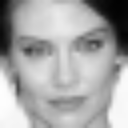

Mask: 0.0


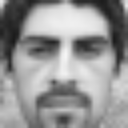

Mask: 0.0


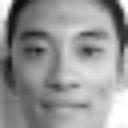

Mask: 0.0


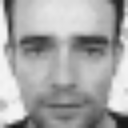

Mask: 0.0


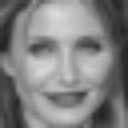

Mask: 0.0


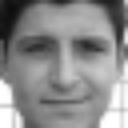

Mask: 0.0


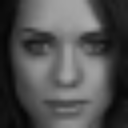

Mask: 0.0


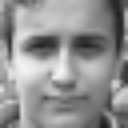

Mask: 0.0


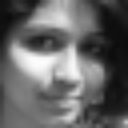

Mask: 0.0


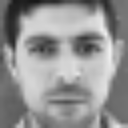

Mask: 0.0


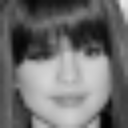

Mask: 0.0


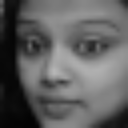

Mask: 0.0


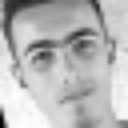

Mask: 0.0


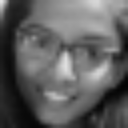

Mask: 0.0


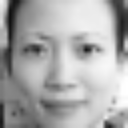

Mask: 0.0


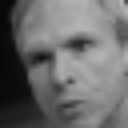

Mask: 0.0


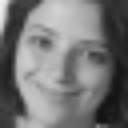

Mask: 0.0


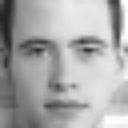

Mask: 0.0


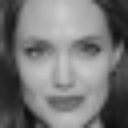

Mask: 0.0


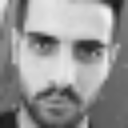

Mask: 0.0


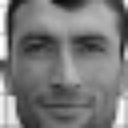

Mask: 0.0


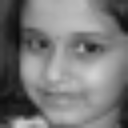

Mask: 0.0


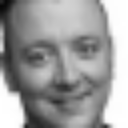

Mask: 0.0


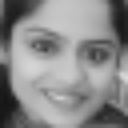

Mask: 0.0


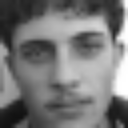

Mask: 0.0


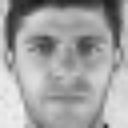

Mask: 0.0


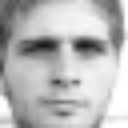

Mask: 0.0


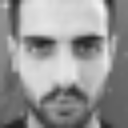

Mask: 0.0


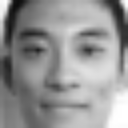

Mask: 0.0


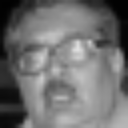

Mask: 0.0


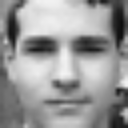

Mask: 0.0


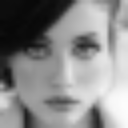

Mask: 0.0


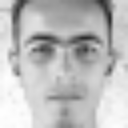

Mask: 0.0


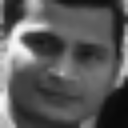

Mask: 0.0


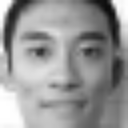

Mask: 0.0


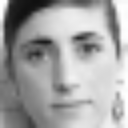

Mask: 0.0


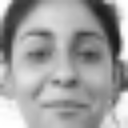

Mask: 0.0


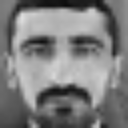

Mask: 0.0


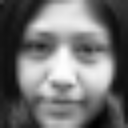

Mask: 0.0


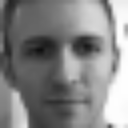

Mask: 0.0


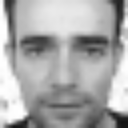

Mask: 0.0


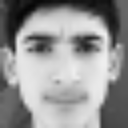

Mask: 0.0


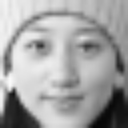

Mask: 0.0


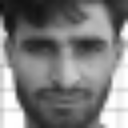

Mask: 0.0


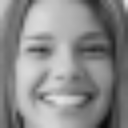

Mask: 0.0


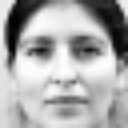

Mask: 0.0


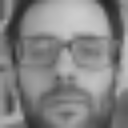

Mask: 0.0


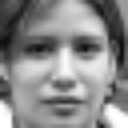

Mask: 0.0


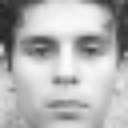

Mask: 0.0


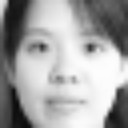

Mask: 0.0


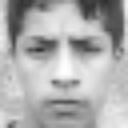

Mask: 0.0


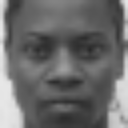

Mask: 0.0


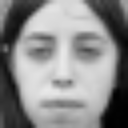

Mask: 0.0


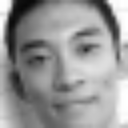

Mask: 0.0


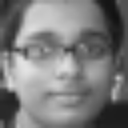

Mask: 0.0


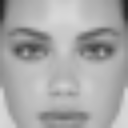

Mask: 0.0


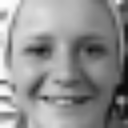

Mask: 0.0


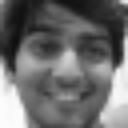

Mask: 0.0


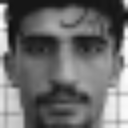

Mask: 0.0


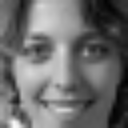

Mask: 0.0


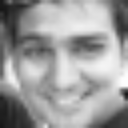

Mask: 0.1


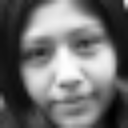

Mask: 0.0


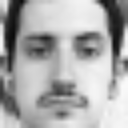

Mask: 0.0


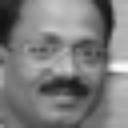

Mask: 0.0


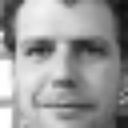

Mask: 0.0


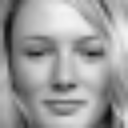

Mask: 0.0


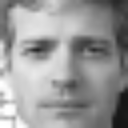

Mask: 0.0


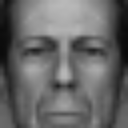

Mask: 0.0


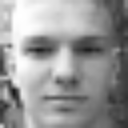

Mask: 0.0


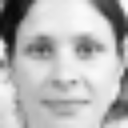

Mask: 0.0


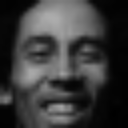

Mask: 0.0


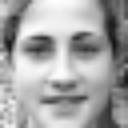

Mask: 0.0


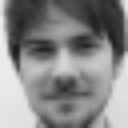

Mask: 0.0


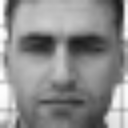

Mask: 0.0


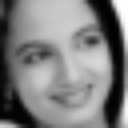

Mask: 0.0


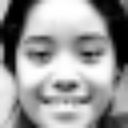

Mask: 0.0


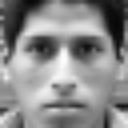

Mask: 0.0


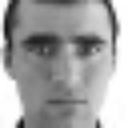

Mask: 0.0


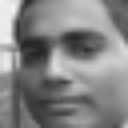

Mask: 0.0


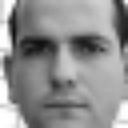

Mask: 0.0


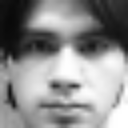

Mask: 0.0


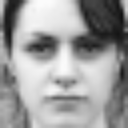

Mask: 0.0


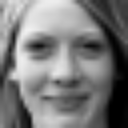

Mask: 0.0


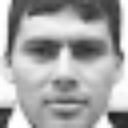

Mask: 0.0


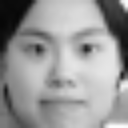

Mask: 0.0


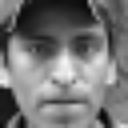

Mask: 0.0


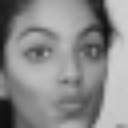

Mask: 0.0


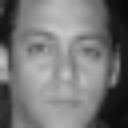

Mask: 0.0


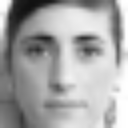

Mask: 0.0


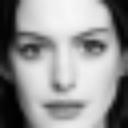

Mask: 0.0


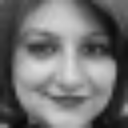

Mask: 0.0


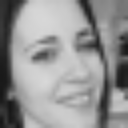

Mask: 0.0


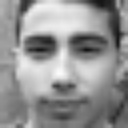

Mask: 0.0


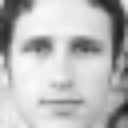

Mask: 0.0


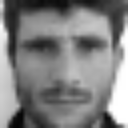

Mask: 0.0


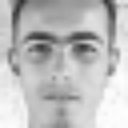

Mask: 0.0


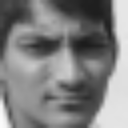

Mask: 0.0


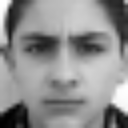

Mask: 0.0


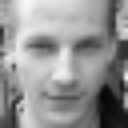

Mask: 0.0


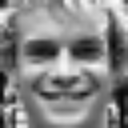

Mask: 0.0


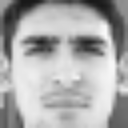

Mask: 0.0


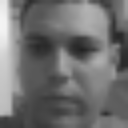

Mask: 0.0


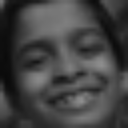

Mask: 0.0


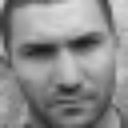

Mask: 0.0


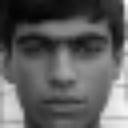

Mask: 0.0


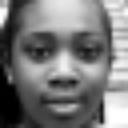

Mask: 0.0


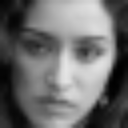

Mask: 0.0


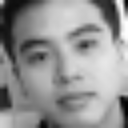

Mask: 0.0


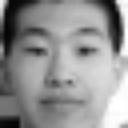

Mask: 0.0


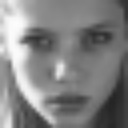

Mask: 0.1


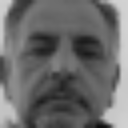

Mask: 0.0


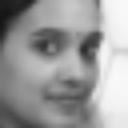

Mask: 0.0


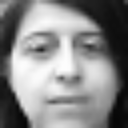

Mask: 0.0


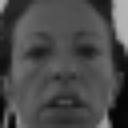

Mask: 0.0


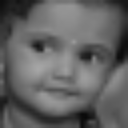

Mask: 0.0


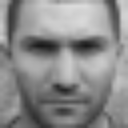

Mask: 0.0


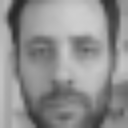

Mask: 0.0


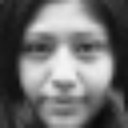

Mask: 0.0


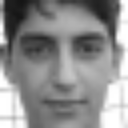

Mask: 0.0


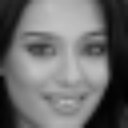

Mask: 0.0


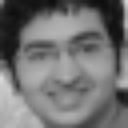

Mask: 0.0


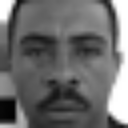

Mask: 0.0


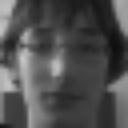

Mask: 0.0


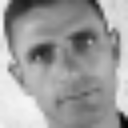

Mask: 0.0


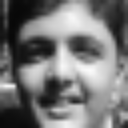

Mask: 0.0


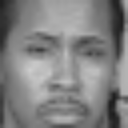

Mask: 0.0


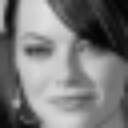

Mask: 0.0


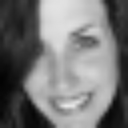

Mask: 0.0


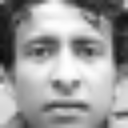

Mask: 0.0


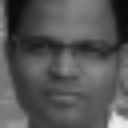

Mask: 0.0


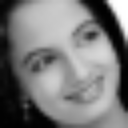

Mask: 0.0


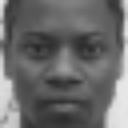

Mask: 0.0


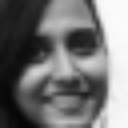

Mask: 0.0


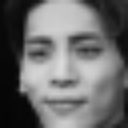

Mask: 0.0


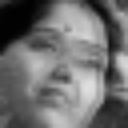

Mask: 0.0


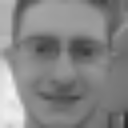

Mask: 0.0


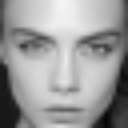

Mask: 0.0


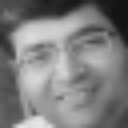

Mask: 0.1


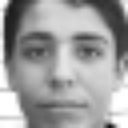

Mask: 0.0


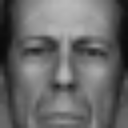

Mask: 0.0


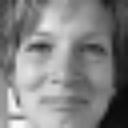

Mask: 0.0


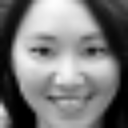

Mask: 0.0


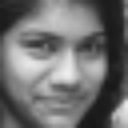

Mask: 0.0


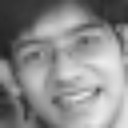

Mask: 0.0


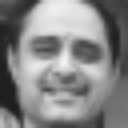

Mask: 0.0


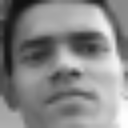

Mask: 0.0


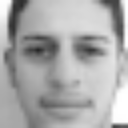

Mask: 0.0


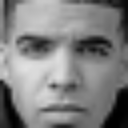

Mask: 0.0


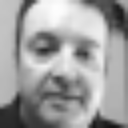

Mask: 0.0


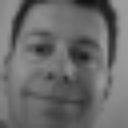

Mask: 0.0


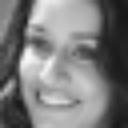

Mask: 0.0


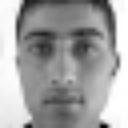

Mask: 0.0


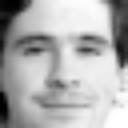

Mask: 0.0


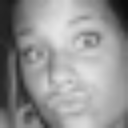

Mask: 0.0


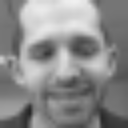

Mask: 0.0


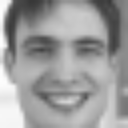

Mask: 0.0


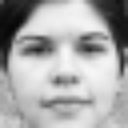

Mask: 0.0


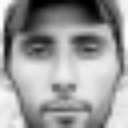

Mask: 0.0


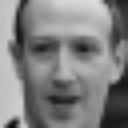

Mask: 0.0


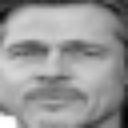

Mask: 0.0


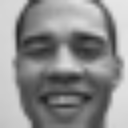

Mask: 0.0


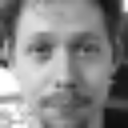

Mask: 0.0


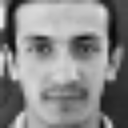

Mask: 0.0


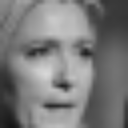

Mask: 0.0


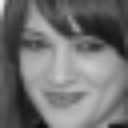

Mask: 0.0


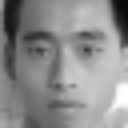

Mask: 0.0


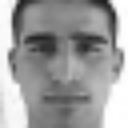

Mask: 0.0


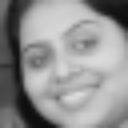

Mask: 0.0


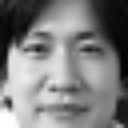

Mask: 0.0


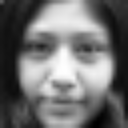

Mask: 0.0


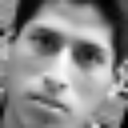

Mask: 0.2


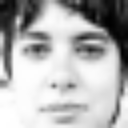

Mask: 0.0


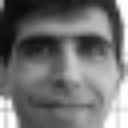

Mask: 0.0


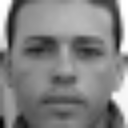

Mask: 0.0


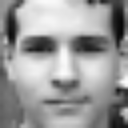

Mask: 0.0


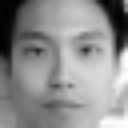

Mask: 0.0


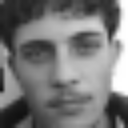

Mask: 0.0


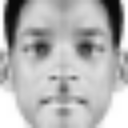

Mask: 0.0


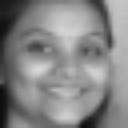

Mask: 0.0


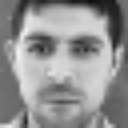

Mask: 0.0


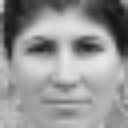

Mask: 0.0


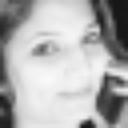

Mask: 0.0


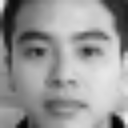

Mask: 0.0


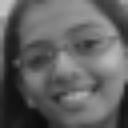

Mask: 0.0


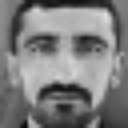

Mask: 0.0


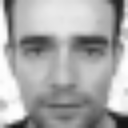

Mask: 0.0


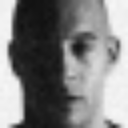

Mask: 0.1


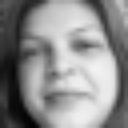

Mask: 0.0


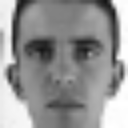

Mask: 0.0


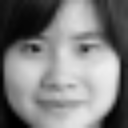

Mask: 0.0


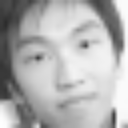

Mask: 0.0


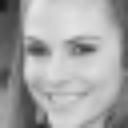

Mask: 0.0


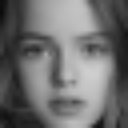

Mask: 0.0


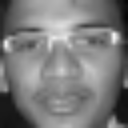

Mask: 0.0


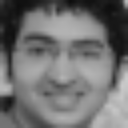

Mask: 0.0


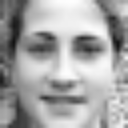

Mask: 0.0


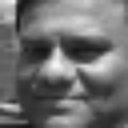

Mask: 0.0


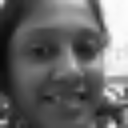

Mask: 0.1


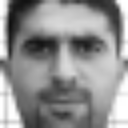

Mask: 0.0


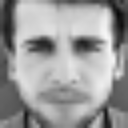

Mask: 0.0


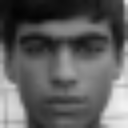

Mask: 0.0


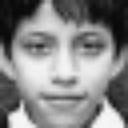

Mask: 0.0


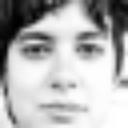

Mask: 0.0


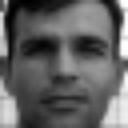

Mask: 0.0


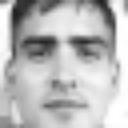

Mask: 0.0


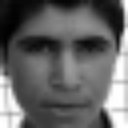

Mask: 0.0


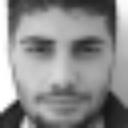

Mask: 0.0


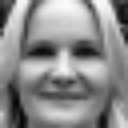

Mask: 0.0


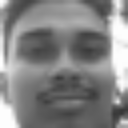

Mask: 0.0


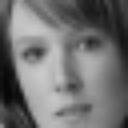

Mask: 0.0


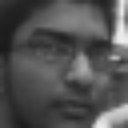

Mask: 0.0


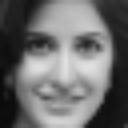

Mask: 0.0


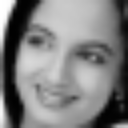

Mask: 0.0


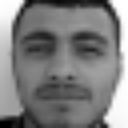

Mask: 0.0


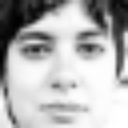

Mask: 0.0


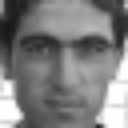

Mask: 0.0


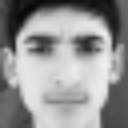

Mask: 0.0


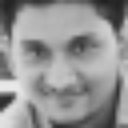

Mask: 0.0


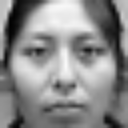

Mask: 0.0


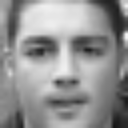

Mask: 0.0


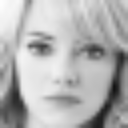

Mask: 0.0


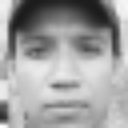

Mask: 0.0


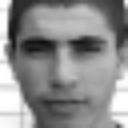

Mask: 0.0


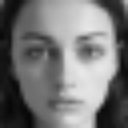

Mask: 0.0


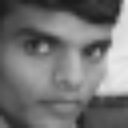

Mask: 0.0


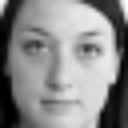

Mask: 0.0


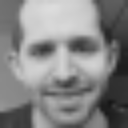

Mask: 0.0


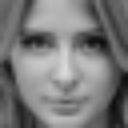

Mask: 0.0


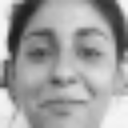

Mask: 0.0


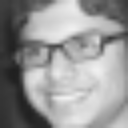

Mask: 0.0


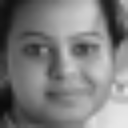

Mask: 0.0


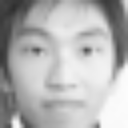

Mask: 0.0


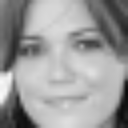

Mask: 0.0


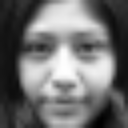

Mask: 0.0


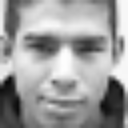

Mask: 0.0


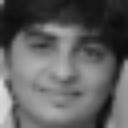

Mask: 0.0


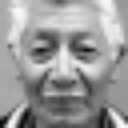

Mask: 0.0


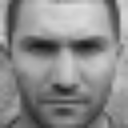

Mask: 0.0


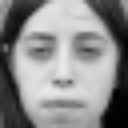

Mask: 0.0


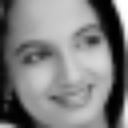

Mask: 0.0


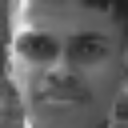

Mask: 0.0


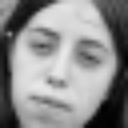

Mask: 0.0


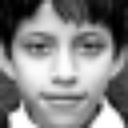

Mask: 0.0


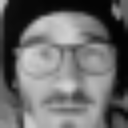

Mask: 0.0


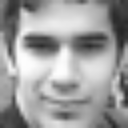

Mask: 0.0


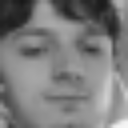

Mask: 0.0


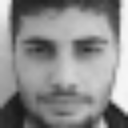

Mask: 0.0


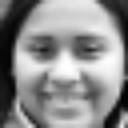

Mask: 0.0


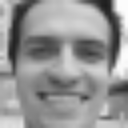

Mask: 0.0


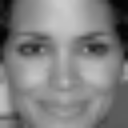

Mask: 0.0


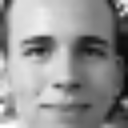

Mask: 0.0


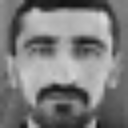

Mask: 0.0


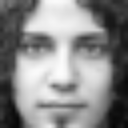

Mask: 0.0


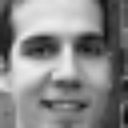

Mask: 0.0


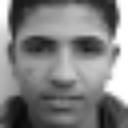

Mask: 0.0


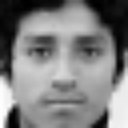

Mask: 0.0


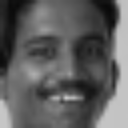

Mask: 0.0


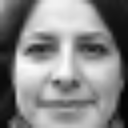

Mask: 0.0


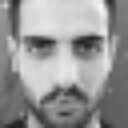

Mask: 0.0


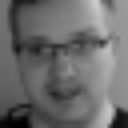

Mask: 0.1


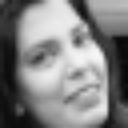

Mask: 0.0


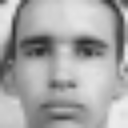

Mask: 0.0


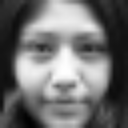

Mask: 0.0


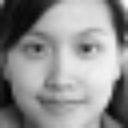

Mask: 0.0


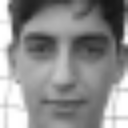

Mask: 0.0


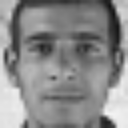

Mask: 0.0


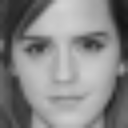

Mask: 0.0


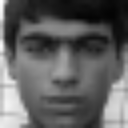

Mask: 0.0


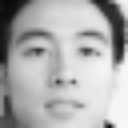

Mask: 0.0


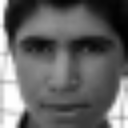

Mask: 0.0


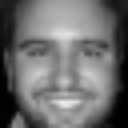

Mask: 0.0


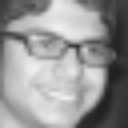

Mask: 0.2


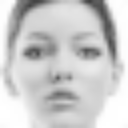

Mask: 0.0


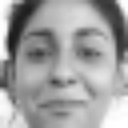

Mask: 0.0


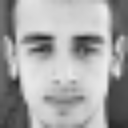

Mask: 0.0


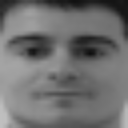

Mask: 0.0


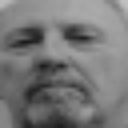

Mask: 0.0


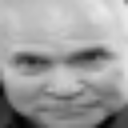

Mask: 0.0


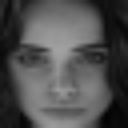

Mask: 0.0


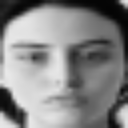

Mask: 0.0


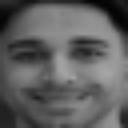

Mask: 0.0


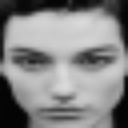

Mask: 0.0


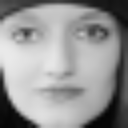

Mask: 0.4


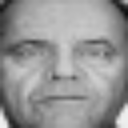

Mask: 0.0


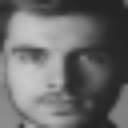

Mask: 0.0


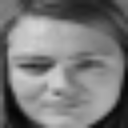

Mask: 0.0


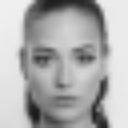

Mask: 0.0


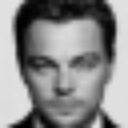

Mask: 0.1


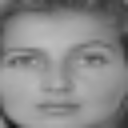

Mask: 0.0


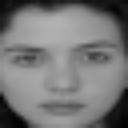

Mask: 0.0


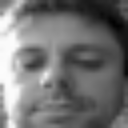

Mask: 0.0


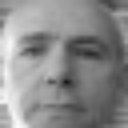

Mask: 0.0


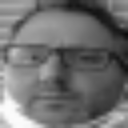

Mask: 0.0


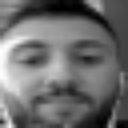

Mask: 0.0


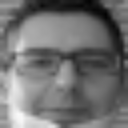

Mask: 0.0


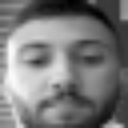

Mask: 0.0


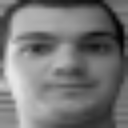

Mask: 0.0


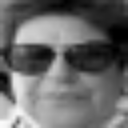

Mask: 0.0


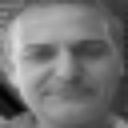

Mask: 0.0


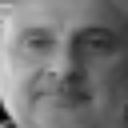

Mask: 0.0


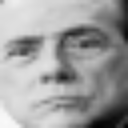

Mask: 0.0


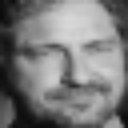

Mask: 0.5


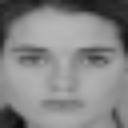

Mask: 0.0


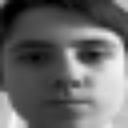

Mask: 0.0


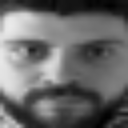

Mask: 0.0


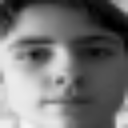

Mask: 0.0


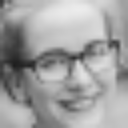

Mask: 0.0


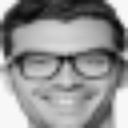

Mask: 0.0


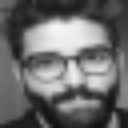

Mask: 0.0


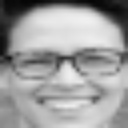

Mask: 0.2


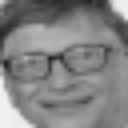

Mask: 0.0


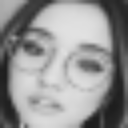

Mask: 0.0


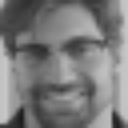

Mask: 0.1


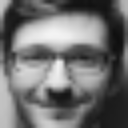

Mask: 0.0


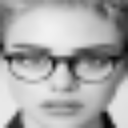

Mask: 0.0


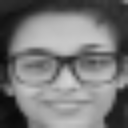

Mask: 0.0


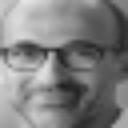

Mask: 0.0


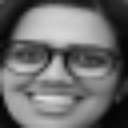

Mask: 0.0


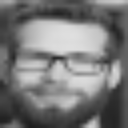

Mask: 0.0


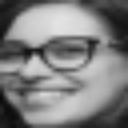

Mask: 0.5


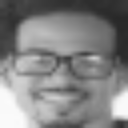

Mask: 0.0


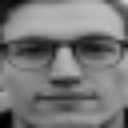

Mask: 0.0


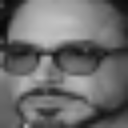

Mask: 0.0


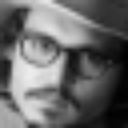

Mask: 0.1


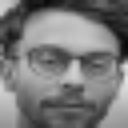

Mask: 0.0


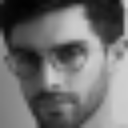

Mask: 0.5


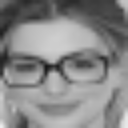

Mask: 0.0


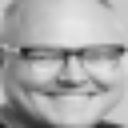

Mask: 0.0


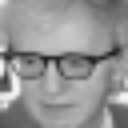

Mask: 0.0


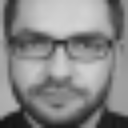

Mask: 0.0


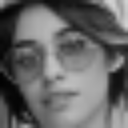

Mask: 0.2


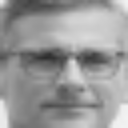

Mask: 0.0


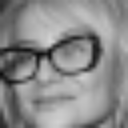

Mask: 0.0


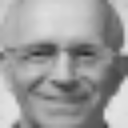

Mask: 0.0


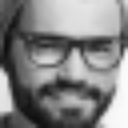

Mask: 0.0


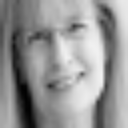

Mask: 0.0


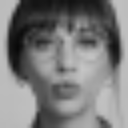

Mask: 0.0


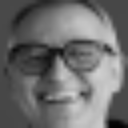

Mask: 0.0


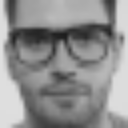

Mask: 0.0


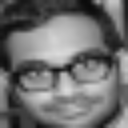

Mask: 0.0


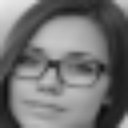

Mask: 0.0


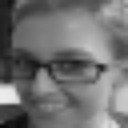

Mask: 0.0


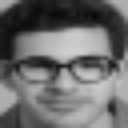

Mask: 0.0


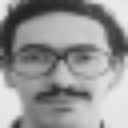

Mask: 0.0


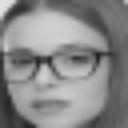

Mask: 0.0


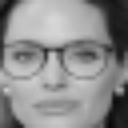

Mask: 0.0


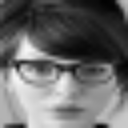

Mask: 1.0


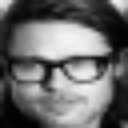

Mask: 0.0


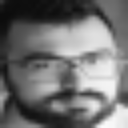

Mask: 0.0


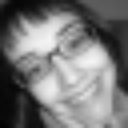

Mask: 0.0


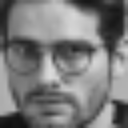

Mask: 0.0


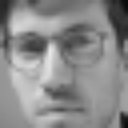

Mask: 0.0


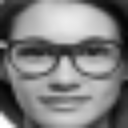

Mask: 0.0


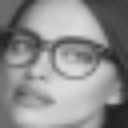

Mask: 0.0


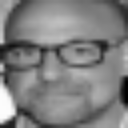

Mask: 0.0


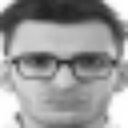

Mask: 0.0


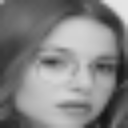

Mask: 0.1


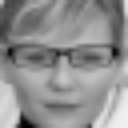

Mask: 0.0


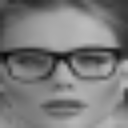

Mask: 0.0


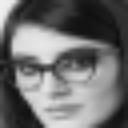

Mask: 0.0


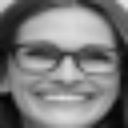

Mask: 0.0


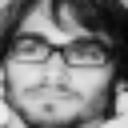

Mask: 0.0


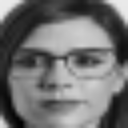

Mask: 0.0


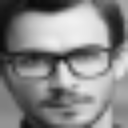

Mask: 0.0


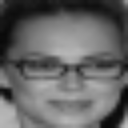

Mask: 0.0


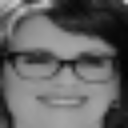

Mask: 0.0


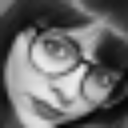

Mask: 1.0


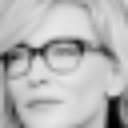

Mask: 0.0


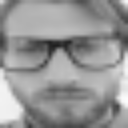

Mask: 0.0


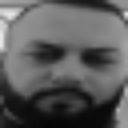

Mask: 0.0


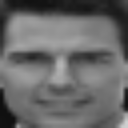

Mask: 0.0


In [65]:
def load_model_joblib(inp_name):
    # Load a pipeline
    my_model_loaded = joblib.load(inp_name)
    return my_model_loaded

def test_pickle(X):
    size=32
    channel=1
    model = load_model_joblib("model.pkl")
    label = model.predict(X)
    res = model.predict_proba(X)
     
    for i in range(0, res.shape[0]):
        mask_perc = res[i][0]
        no_mask_perc = res[i][1]
        im = X[i,:].reshape(size,size,channel)
        im = cv2.resize(im, (128,128))
        #cv2.putText(im, "Mask: " + str(np.round(mask_perc,1))  ,(10,30), cv2.FONT_HERSHEY_COMPLEX,1, (0,255,0),1)
        cv2_imshow(np.uint8(im))
        print( "Mask: " + str(np.round(mask_perc,1)) )
    
test_pickle(X)